##  Optimization manual steps

In [1]:
import random
import numpy as np
import pprint

from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot

np.random.seed(1337)
random.seed(1337)

#### Multi Layer Perceptron 1-2-1

In [2]:
# loss function single MLP
def loss_single(target, output):
    total_loss = output - target
    total_loss.type="l"
    return total_loss

In [3]:
# initialize a model
nin = 1  # number of inputs
nout = 1  # number of outputs
Value.value_counter = 0
pp = pprint.PrettyPrinter(indent=4)

model = MLP(
    nin, [2, nout], randomweights=False, lastReLU=False
)  # 2-layer neural network
xinumbers = list(range(1, nin + 1))
xinput = [Value(x, type="i") for x in xinumbers]
print("inputs= ", xinput[0].data)
# print(model.layers[0].neurons[0].w)
# print(model.layers[0].neurons[1].w)
print("weights=",model.layers[0].neurons[0].w[0].data," , ",model.layers[0].neurons[1].w[0].data)

model.layers[0].neurons[0].w[0].data=0.3
model.layers[0].neurons[1].w[0].data=0.4
model.layers[1].neurons[0].w[0].data=0.5
model.layers[1].neurons[0].w[1].data=0.6
print("weights=",model.layers[0].neurons[0].w[0].data," , ",model.layers[0].neurons[1].w[0].data)
pp.pprint(model.parameters())

xtarget = Value(1.2, type="t")  # desired targets

inputs=  1
weights= 0.5  ,  0.5
weights= 0.3  ,  0.4
[   Value(name=val1,neuronnumber=n1,weightnumber=,type=w1,data=0.3, grad=0),
    Value(name=val2,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0),
    Value(name=val3,neuronnumber=n2,weightnumber=,type=w1,data=0.4, grad=0),
    Value(name=val4,neuronnumber=n2,weightnumber=,type=b,data=0, grad=0),
    Value(name=val5,neuronnumber=n1,weightnumber=,type=w1,data=0.5, grad=0),
    Value(name=val6,neuronnumber=n1,weightnumber=,type=w2,data=0.6, grad=0),
    Value(name=val7,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0)]


In [4]:
# Optimization Step
def opt_step():
    #### forward pass
    activation = model(xinput)
    loss = loss_single(activation, xtarget)
    print("loss= ", loss.data)

    #### backward pass
    for p in model.parameters():
        p.grad = 0.0
    loss.backward()

    draw_dot(loss, debug_print_01=False)

    #### update
    for p in model.parameters():
        p.data += -0.1 * p.grad
    print("updated parameters")
    pp.pprint(model.parameters())

In [5]:
opt_step()

loss=  0.8099999999999999
[   Value(name=val1,neuronnumber=n1,weightnumber=,type=w1,data=0.35, grad=-0.5),
    Value(name=val2,neuronnumber=n1,weightnumber=,type=b,data=0.05, grad=-0.5),
    Value(name=val3,neuronnumber=n2,weightnumber=,type=w1,data=0.46, grad=-0.6),
    Value(name=val4,neuronnumber=n2,weightnumber=,type=b,data=0.06, grad=-0.6),
    Value(name=val5,neuronnumber=n1,weightnumber=,type=w1,data=0.53, grad=-0.3),
    Value(name=val6,neuronnumber=n1,weightnumber=,type=w2,data=0.64, grad=-0.4),
    Value(name=val7,neuronnumber=n1,weightnumber=,type=b,data=0.1, grad=-1.0)]


In [6]:
opt_step()

loss=  0.5551999999999999
[   Value(name=val1,neuronnumber=n1,weightnumber=,type=w1,data=0.40299999999999997, grad=-0.53),
    Value(name=val2,neuronnumber=n1,weightnumber=,type=b,data=0.10300000000000001, grad=-0.53),
    Value(name=val3,neuronnumber=n2,weightnumber=,type=w1,data=0.524, grad=-0.64),
    Value(name=val4,neuronnumber=n2,weightnumber=,type=b,data=0.124, grad=-0.64),
    Value(name=val5,neuronnumber=n1,weightnumber=,type=w1,data=0.5700000000000001, grad=-0.39999999999999997),
    Value(name=val6,neuronnumber=n1,weightnumber=,type=w2,data=0.6920000000000001, grad=-0.52),
    Value(name=val7,neuronnumber=n1,weightnumber=,type=b,data=0.2, grad=-1.0)]


In [7]:
opt_step()

loss=  0.26316399999999995
[   Value(name=val1,neuronnumber=n1,weightnumber=,type=w1,data=0.45999999999999996, grad=-0.5700000000000001),
    Value(name=val2,neuronnumber=n1,weightnumber=,type=b,data=0.16000000000000003, grad=-0.5700000000000001),
    Value(name=val3,neuronnumber=n2,weightnumber=,type=w1,data=0.5932000000000001, grad=-0.6920000000000001),
    Value(name=val4,neuronnumber=n2,weightnumber=,type=b,data=0.1932, grad=-0.6920000000000001),
    Value(name=val5,neuronnumber=n1,weightnumber=,type=w1,data=0.6206, grad=-0.506),
    Value(name=val6,neuronnumber=n1,weightnumber=,type=w2,data=0.7568, grad=-0.648),
    Value(name=val7,neuronnumber=n1,weightnumber=,type=b,data=0.30000000000000004, grad=-1.0)]


#### forward pass 1

In [8]:
activation = model(xinput)
print("activation= ", activation.data)
loss = loss_single(activation, xtarget)
print("loss= ", loss.data)

activation=  1.2799195200000002
loss=  -0.07991952000000024


#### backward pass 1

loss=  -0.07991952000000024


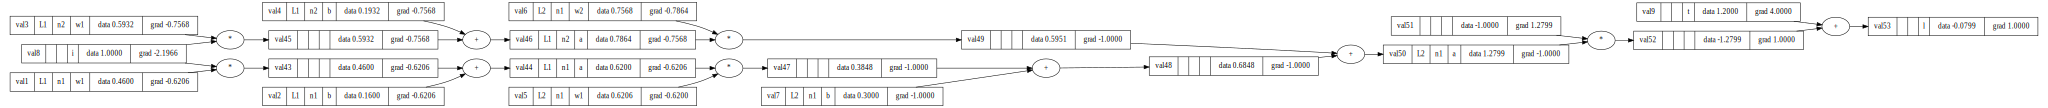

In [9]:
for p in model.parameters():
    p.grad = 0.0
loss.backward()

print("loss= ", loss.data)
draw_dot(loss, debug_print_01=False)

#### update 1

In [10]:
for p in model.parameters():
    p.data += -0.1 * p.grad
pp.pprint(model.parameters())

[   Value(name=val1,neuronnumber=n1,weightnumber=,type=w1,data=0.52206, grad=-0.6206),
    Value(name=val2,neuronnumber=n1,weightnumber=,type=b,data=0.22206000000000004, grad=-0.6206),
    Value(name=val3,neuronnumber=n2,weightnumber=,type=w1,data=0.66888, grad=-0.7568),
    Value(name=val4,neuronnumber=n2,weightnumber=,type=b,data=0.26888, grad=-0.7568),
    Value(name=val5,neuronnumber=n1,weightnumber=,type=w1,data=0.6826000000000001, grad=-0.62),
    Value(name=val6,neuronnumber=n1,weightnumber=,type=w2,data=0.8354400000000001, grad=-0.7864000000000001),
    Value(name=val7,neuronnumber=n1,weightnumber=,type=b,data=0.4, grad=-1.0)]


#### forward pass 2

In [11]:
activation = model(xinput)
print("activation= ", activation.data)
loss = loss_single(activation, xtarget)
print("loss= ", loss.data)

activation=  1.6913785264000003
loss=  -0.49137852640000035


#### backward pass 2

loss=  -0.49137852640000035


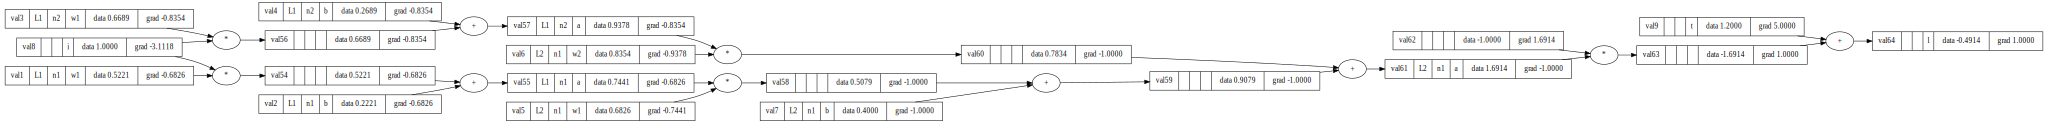

In [12]:
for p in model.parameters():
    p.grad = 0.0
loss.backward()

print("loss= ", loss.data)
draw_dot(loss, debug_print_01=False)

#### update 2

In [13]:
for p in model.parameters():
    p.data += -0.1 * p.grad
pp.pprint(model.parameters())

[   Value(name=val1,neuronnumber=n1,weightnumber=,type=w1,data=0.59032, grad=-0.6826000000000001),
    Value(name=val2,neuronnumber=n1,weightnumber=,type=b,data=0.29032, grad=-0.6826000000000001),
    Value(name=val3,neuronnumber=n2,weightnumber=,type=w1,data=0.752424, grad=-0.8354400000000001),
    Value(name=val4,neuronnumber=n2,weightnumber=,type=b,data=0.352424, grad=-0.8354400000000001),
    Value(name=val5,neuronnumber=n1,weightnumber=,type=w1,data=0.7570120000000001, grad=-0.74412),
    Value(name=val6,neuronnumber=n1,weightnumber=,type=w2,data=0.929216, grad=-0.93776),
    Value(name=val7,neuronnumber=n1,weightnumber=,type=b,data=0.5, grad=-1.0)]


#### forward pass 3

In [14]:
activation = model(xinput)
print("activation= ", activation.data)
loss = loss_single(activation, xtarget)
print("loss= ", loss.data)

activation=  2.193297486848
loss=  -0.993297486848


#### backward pass 3

loss=  -0.993297486848


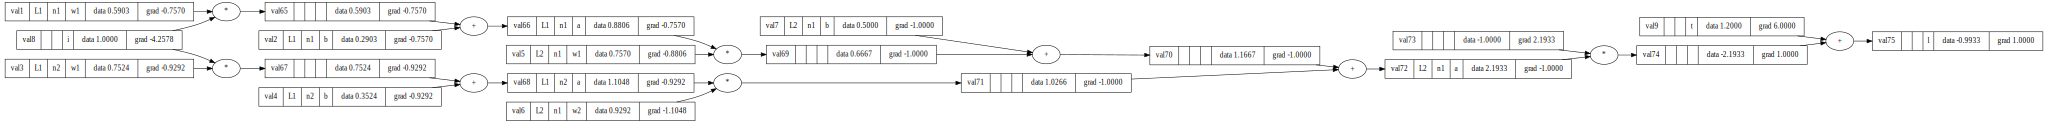

In [15]:
for p in model.parameters():
    p.grad = 0.0
loss.backward()

print("loss= ", loss.data)
draw_dot(loss, debug_print_01=False)

#### update 3

In [16]:
for p in model.parameters():
    p.data += -0.1 * p.grad
pp.pprint(model.parameters())

[   Value(name=val1,neuronnumber=n1,weightnumber=,type=w1,data=0.6660212, grad=-0.7570120000000001),
    Value(name=val2,neuronnumber=n1,weightnumber=,type=b,data=0.36602120000000005, grad=-0.7570120000000001),
    Value(name=val3,neuronnumber=n2,weightnumber=,type=w1,data=0.8453456, grad=-0.929216),
    Value(name=val4,neuronnumber=n2,weightnumber=,type=b,data=0.4453456, grad=-0.929216),
    Value(name=val5,neuronnumber=n1,weightnumber=,type=w1,data=0.8450760000000002, grad=-0.88064),
    Value(name=val6,neuronnumber=n1,weightnumber=,type=w2,data=1.0397008, grad=-1.104848),
    Value(name=val7,neuronnumber=n1,weightnumber=,type=b,data=0.6, grad=-1.0)]
